## Analysis of High-dimensional Gaussian Labeled-unlabeled Mixture Model via Message-passing Algorithm

### 1. Problem setting

Let $\mathcal{D}^l = \{(\boldsymbol{x}_\mu,y_\mu)\}_{\mu = 1}^{M_l}$ be the set of labeled data points: The label $y_\mu$ is encoded as $y_\mu \in \{-1,1\}$ and the feature vector $\boldsymbol{x}_\mu$ is assumed to be a real $N$-dimensional vector $\boldsymbol{x}_\mu \in \mathbb{R}^N$. We assume each label is independently and identically distributed (i.i.d.) from the following distribution:
$$p(y_\mu) = \rho \delta_{y_\mu,+1} + (1-\rho) \delta_{y_\mu,-1},$$
where $\delta_{a,b}$ denotes Kronecker delta and the parameter $\rho\in[0,1]$ controls the balance of the two labels. Given $y_\mu$, the feature vector $\boldsymbol{x}_\mu$ is generated by
$$\boldsymbol{x}_\mu = y_\mu \frac{\boldsymbol{w}_0}{\sqrt{N}} + \boldsymbol{\xi}_\mu,$$
where $\boldsymbol{w}_0\in \mathbb{R}^N$ characterizes the cluster center, and $\boldsymbol{\xi}_\mu\in\mathbb{R}^N$ is a Gaussian noise vector i.i.d. from $\mathcal{N}(\boldsymbol{0}_N, \sigma_0^2 I_N)$ where $I_N$ denotes the $N$-dimensional identity matrix. Similarly, let $\mathcal{D}^{u}=\{\boldsymbol{x}_\nu\}_{\nu = 1}^{M_u}$ denotes the unlabeled dataset, each component $\boldsymbol{x}_{\nu}$ of which is i.i.d. from the same generative model as the labeled one, except that the labels are not observed. 
Therefore, the total dataset $\mathcal{D} = \mathcal{D}^l \cup \mathcal{D}^u$, the size of which is denoted as $M=M_l+M_u$, obeys the following distribution:
$$p(\mathcal{D} \mid \boldsymbol{w}_0;\sigma_0^2) = \Bigg[\prod_{\mu\in \mathcal{D}^l}\frac{1}{\sqrt{2\pi \sigma_0^2}}\exp\bigg\{{-\frac{1}{2\sigma_0^2}\Big(\boldsymbol{x}_\mu -\frac{y_\mu \boldsymbol{w}_0}{\sqrt{N}}\Big)^2}\bigg\}\Bigg]\times\Bigg[\prod_{\nu \in \mathcal{D}^u}\frac{1}{\sqrt{2\pi\sigma_0^2}}\bigg(\rho\exp\bigg\{-\frac{1}{2\sigma_0^2}\Big(\boldsymbol{x}_{\nu} - \frac{\boldsymbol{w}_0}{\sqrt{N}}\Big)^2\bigg\} + (1-\rho)\exp\bigg\{-\frac{1}{2\sigma_0^2}\Big(\boldsymbol{x}_{\nu} + \frac{\boldsymbol{w}_0}{\sqrt{N}}\Big)^2 \bigg\}\bigg)\Bigg].
$$Based on this generative model, we deal with a problem to estimate $\boldsymbol{w}_0$ from the given dataset $\mathcal{D}$. To this end, we consider two approaches: the Bayesian approach and RMLE. For the former one, we introduce a zero-mean Gaussian as the prior distribution:
$$
p(\boldsymbol{w};\lambda_0)=\sqrt{\frac{\lambda_0}{2\pi}}e^{-\frac{1}{2}\lambda_0 \boldsymbol{w}^2}.$$
The posterior distribution is thus given by
$$
p(\boldsymbol{w} \mid \mathcal{D};\sigma^2,\lambda)\propto p(\mathcal{D} \mid \boldsymbol{w};\sigma^2)p(\boldsymbol{w};\lambda).
$$
This becomes the central object for the Bayesian approach. To simplify the situation, we assume that the model parameter $\sigma_0^2$ is known and $\sigma^2=\sigma_0^2$ holds throughout the paper. Here $\boldsymbol{w}$ denotes the parameter variables while $\boldsymbol{w}_0$ represents the true parameter values; this subscript rule is applied to other parameters such as $\lambda$. For the latter RMLE one, we have a point estimator for $\boldsymbol{w}_0$ defined by
$$
	\hat{\boldsymbol{w}}(\mathcal{D};\sigma^2,\lambda) = \operatorname*{arg\,min}_{\boldsymbol{w}}
	\Bigg[
	-\log p(\mathcal{D} \mid \boldsymbol{w};\sigma^2)+\frac{1}{2}\lambda \boldsymbol{w}^2
	\Bigg]
=
 \operatorname*{arg\,min}_{\boldsymbol{w}}
	\Bigg[ 
	-\log p(\boldsymbol{w} \mid \mathcal{D};\sigma^2,\lambda)
	\Bigg].
$$
The aim of this paper is to analyze the property of this estimator and to compare its performance with that of the Bayesian approach. These two approaches can be treated in a unified manner by the $\beta$-posterior:
$$
p_{\beta}(\boldsymbol{w}\mid \mathcal{D};\sigma^2,\lambda) = \frac{1}{Z_{\beta}}p^{\beta}(\mathcal{D}\mid \boldsymbol{w};\sigma^2) p^{\beta}(\boldsymbol{w};\lambda).
$$
The posterior distribution is reproduced at $\beta=1$ and the limit $\beta\to \infty$ yields the point-wise measure at the RMLE estimator as $p_{\beta}(\boldsymbol{w}\mid \mathcal{D};\sigma^2,\lambda) \to \delta( \boldsymbol{w}-\hat{\boldsymbol{w}}(\mathcal{D};\sigma^2,\lambda ))$. Hence we may concentrate on computing the expectation over the $\beta$-posterior in general $\beta$ instead of treating those two approaches separately. 

### 2. Factor graph representation

To handle the $\beta$-posterior, we employ the framework of graphical modeling and message-passing algorithms. For this, we represent the $\beta$-posterior as the following factorized form:
$$p_{\beta}(\boldsymbol{w}\mid \mathcal{D};\sigma^2,\lambda) = \frac{1}{Z_\beta} \prod_{\mu \in \mathcal{D}^l} \Phi_\mu^l(\boldsymbol{w},\boldsymbol{x}_\mu,y_\mu)\prod_{\nu\in\mathcal{D}^u}\Phi_\nu^u(\boldsymbol{w},\boldsymbol{x}_\nu)\prod_{i=1}^N \psi_{i}(w_i),
$$
where
$$
    \Phi_{\mu}^l(\boldsymbol{w},\boldsymbol{x}_\mu,y_\mu)= \exp\bigg\{{-\frac{\beta}{2\sigma^2}\Big(\boldsymbol{x}_\mu -\frac{y_\mu \boldsymbol{w}}{\sqrt{N}}\Big)^2}\bigg\},$$
    $$\Phi_{\nu}^u(\boldsymbol{w},\boldsymbol{x}_\nu) =\bigg(\rho\exp\bigg\{-\frac{1}{2\sigma^2}\Big(\boldsymbol{x}_{\nu} - \frac{\boldsymbol{w}}{\sqrt{N}}\Big)^2\bigg\}+ (1-\rho)\exp\bigg\{-\frac{1}{2\sigma^2}\Big(\boldsymbol{x}_{\nu} + \frac{\boldsymbol{w}}{\sqrt{N}}\Big)^2 \bigg\}\bigg)^\beta,$$
    $$\psi_{i}(w_i) \propto \exp\bigg\{-\frac{\beta}{2}\lambda w_i^2 \bigg\}.
$$

### 3. Belief propagation and approximate belief propagation

$$
    \tilde{\phi}_{\mu\to i}^l(w_i)\propto \int \bigg( \prod_{j(\neq i)}dw_j\bigg) \Phi_\mu^l(\boldsymbol{w},\boldsymbol{x}_\mu,y_\mu)\prod_{j (\neq i)}^N \phi_{j\to\mu}^l(w_j),$$
    $$\phi_{i\to\mu}^l(w_i) \propto \psi(w_i)\prod_{\omega (\neq \mu)}^{M_l}\tilde{\phi}_{\omega\to i}^l(w_i)\prod_{\nu=1}^{M_u}\tilde{\phi}_{\nu\to i}^u(w_i),$$
    $$\tilde{\phi}_{\nu\to i}^u(w_i) \propto  \int \bigg( \prod_{j(\neq i)}dw_j\bigg) \Phi_\nu^u(\boldsymbol{w},\boldsymbol{x}_\nu)\prod_{j (\neq i)}^N \phi_{j\to\nu}^u(w_j),$$
    $$\phi_{i\to\nu}^u(w_i) \propto \psi(w_i)\prod_{\mu =1}^{M_l}\tilde{\phi}_{\mu\to i}^l(w_i)\prod_{m(\neq \nu)}^{M_u}\tilde{\phi}_{m\to i}^u(w_i).$$

#### 3.1 The ABP formulas for RMLE 

$$  \tilde{p}_{\nu\to i}^{(t)} = \frac{1}{\sigma^2\sqrt{N}}\sum_{j(\neq i)}^N x_{\nu j}\hat{w}_{j\to\nu}^{(t)},$$
    $$S_\nu^{(t)} = \frac{1}{\sigma^4 N}\sum_{i}^N x_{\nu i}^2 \chi_{i\to \nu}^{(t)},$$
    $$\chi_{i\to \nu}^{(t+1)} = \Bigg(\lambda+\frac{\alpha}{\sigma^2} - \frac{1}{\sigma^4 N}\sum_{m(\neq\nu)}^{M_u} x_{m i}^2  T\Big(\tilde{p}_{m\to i}^{(t)},S_m^{(t)}\Big)\Bigg)^{-1},$$
    $$\hat{w}_{i\to\nu}^{(t+1)} = \frac{\chi_{i\to \nu}^{(t+1)}}{\sigma^2 \sqrt{N}}\Bigg(\sum_{\mu=1}^{M_l}y_\mu x_{\mu i} + \sum_{m(\neq\nu)}^{M_u}x_{m i}F\Big(\tilde{p}_{m\to i}^{(t)},S_m^{(t)}\Big)\Bigg).$$

#### 3.2 The ABP formulas for Bayesian approach 

$$
\tilde{p}_{\nu\to i,B}^{(t)} = \frac{1}{\sigma^2\sqrt{N}}\sum_{j(\neq i)}^N x_{\nu j}\hat{w}_{j\to\nu,B}^{(t)},$$
$$\chi^{(t+1)}_{i\to\nu,B} = \Bigg(\lambda+\frac{\alpha}{\sigma^2}-\frac{1}{\sigma^4 N}\sum_{m\neq\nu}^{M_\mu}x_{m i}^2\tilde{T}\Big(\tilde{p}_{m\to i,B}^{(t)}\Big)\Bigg)^{-1},$$
$$\hat{w}_{i\to\nu,B}^{(t+1)} = \frac{\chi^{(t+1)}_{i\to\nu,B}}{\sigma^2 \sqrt{N}}\Bigg(\sum_{\mu=1}^{M_l}y_\mu x_{\mu i} + \sum_{m(\neq\nu)}^{M_u}x_{m i}\tilde{F}\Big(\tilde{p}_{m\to i,B}^{(t)}\Big)\Bigg),$$

#### 3.3 The SE equation for RMLE 

$$\chi_{t+1}= \Bigg(\lambda+\frac{\alpha}{\sigma^2} - \frac{\alpha_u}{\sigma^2} \int Dz\ \bigg(\rho T\Big(\mathcal{P},\frac{\chi_t}{\sigma^2}\Big)+(1-\rho)T\Big(\mathcal{Q} ,\frac{\chi_t}{\sigma^2}\Big) \bigg)\Bigg)^{-1},$$
    $$k_{t+1} = \chi_{t+1}\Bigg(\frac{\alpha_l}{\sigma^2}+\frac{\alpha_u}{\sigma^2}\int Dz\ \bigg(\rho F\Big(\mathcal{P} ,\frac{\chi_t}{\sigma^2}\Big)-(1-\rho) F\Big(\mathcal{Q} ,\frac{\chi_t}{\sigma^2}\Big)\bigg)\Bigg),$$
    $$v_{t+1} = \chi_{t+1}^2\Bigg(\frac{\alpha_l}{\sigma^2} + \frac{\alpha_u}{\sigma^2} \int Dz\ \bigg(\rho F^2\Big(\mathcal{P}, \frac{\chi_t}{\sigma^2}\big) +(1-\rho) F^2\Big(\mathcal{Q}, \frac{\chi_t}{\sigma^2}\Big)\bigg)\Bigg),$$


1, SE code for general $\rho$:

In [3]:
def seRMLE(rho,lamb,alpha_l,alpha_u,lambda_0,b): #state evolution of RMLE when beta=infty
    k_t = 0.1 #initialized k_t (order parameter)
    chi_t=0.1 #initialized chi_t (order parameter)
    v_t = 0.1 #initialized sigm_t2 (order parameter)
    eps = 1e-8 #threshold value for unpate order parameters
    parameter_old = np.array([chi_t, k_t, v_t])
    parameter_new = np.array([1, 1, 1])
    iter_se2 = 0 #interation number
    k_collect = [k_t] #collection for k
    v_collect = [v_t] #collection for sigma
    chi_collect = [chi_t] #collection for chi
    rsb_collect = 0
    
    def y_s(p,t): #saddle point method solve for Eq.~(24)
        eps = 1e-12 #epsilon
        y_gst = 1 #initial y^*
        y_pre = 0
        while LA.norm(y_gst-y_pre)>eps:
            y_pre = y_gst
            j = p+np.sqrt(t)*y_pre
            k= -(p+np.sqrt(t)*y_pre)
            y_gst = np.sqrt(t)*(rho*np.exp(j)-(1-rho)*np.exp(k))/(rho*np.exp(j)+(1-rho)*np.exp(k))
        return y_gst

    def F(p, t): #function F Eq.~(25)
        return y_s(p,t)/(np.sqrt(t))

    def T(p, t): #function T Eq.~(26)
        return (1-F(p,t)**2)/(1-t*(1-F(p,t)**2))

    while LA.norm(parameter_new - parameter_old) > eps and iter_se2<1e2:
        parameter_old = np.array([chi_t, k_t, v_t])
        iter_se2 += 1

        z_values = np.arange(-10, 10, 0.1)
        exp_values = np.exp(-1/2 * z_values**2)
        f_values_1 = F(k_t/lambda_0*b + np.sqrt(k_t**2/lambda_0*b + v_t*b) * z_values, chi_t*b)
        f_values_2 = F(-k_t/lambda_0*b + np.sqrt(k_t**2/lambda_0*b + v_t*b) * z_values, chi_t*b)
        t_values_1 = T(k_t/lambda_0*b + np.sqrt(k_t**2/lambda_0*b + v_t*b) * z_values, chi_t*b)
        t_values_2 = T(-k_t/lambda_0*b + np.sqrt(k_t**2/lambda_0*b + v_t*b) * z_values, chi_t*b)
        
        sum_t_1 = np.sum(exp_values * t_values_1) / np.sqrt(2 * np.pi) / 10
        sum_t_2 = np.sum(exp_values * t_values_2) / np.sqrt(2 * np.pi) / 10
        
        sum_f_1 = np.sum(exp_values * f_values_1) / np.sqrt(2 * np.pi) / 10
        sum_f_2 = np.sum(exp_values * f_values_2) / np.sqrt(2 * np.pi) / 10
        
        sum_fs_1 = np.sum(exp_values * f_values_1**2) / np.sqrt(2 * np.pi) / 10
        sum_fs_2 = np.sum(exp_values * f_values_2**2) / np.sqrt(2 * np.pi) / 10
        
        chi_new = 1/(1/lamb + b * (alpha_l + alpha_u - alpha_u * (rho*sum_t_1+(1-rho)*sum_t_2))) #SE iter. Eq.~(32a)
        k_new = chi_new * b * (alpha_l + alpha_u * (rho*sum_f_1-(1-rho)*sum_f_2)) #SE iter. Eq.~(32b)
        v_new = chi_new**2 * b * (alpha_l + alpha_u * (rho*sum_fs_1+(1-rho)*sum_fs_2)) #SE iter. Eq.~(32c)
        
        parameter_new = np.array([chi_new, k_new, v_new])
        
        k_collect.append(k_new)
        v_collect.append(sigma_new)
        chi_collect.append(chi_new)
        
        k_t = k_new
        sigma_t2 = sigma_new
        chi_t = chi_new
    #replica symmtric breaking...    
    z_values = np.arange(-10, 10, 0.1)
    exp_values = np.exp(-1/2 * z_values**2)
    
    t_values_1 = T(k_collect[-1]/lambda_0*b + np.sqrt(k_collect[-1]**2/lambda_0*b + v_collect[-1]*b) * z_values, chi_collect[-1]*b)
    t_values_2 = T(-k_collect[-1]/lambda_0*b + np.sqrt(k_collect[-1]**2/lambda_0*b + v_collect[-1]*b) * z_values, chi_collect[-1]*b)
    
    sum_t_rsb_1 = np.sum(exp_values * t_values_1**2) / np.sqrt(2 * np.pi) / 10
    sum_t_rsb_2 = np.sum(exp_values * t_values_2**2) / np.sqrt(2 * np.pi) / 10

    rsb_collect = alpha_u*b**2*chi_collect[-1]**2*(rho*sum_t_rsb_1+(1-rho)*sum_t_rsb_2)
    return k_collect[-1], v_collect[-1], iter_se2, chi_collect[-1], rsb_collect

2, SE code for special $\rho=1/2$:

In [5]:
#RMLE special case - balanced cluster (rho=1/2)
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
import random
import math
#def MMSE(k,sig,s0):#seMMSE_srho(lamb,alpha_l,alpha_u,sigma_0,b) rho=0.5
def seRMLE_srho(lamb,alpha_l,alpha_u,lambda_0,b): #state evolution of RMLE when beta=infty, b=1/sigma^2
    k_t = 0.3 #initialized k_t (order parameter)
    chi_t=0.1 #initialized chi_t (order parameter)
    v_t = 0.1 #initialized sigm_t2 (order parameter)
    eps = 1e-8 #threshold value for unpate order parameters
    parameter_old = np.array([chi_t, k_t, v_t])
    parameter_new = np.array([1, 1, 1])
    iter_se2 = 0 #interation number
    k_collect = [k_t] #collection for k
    v_collect = [v_t] #collection for sigma
    chi_collect = [chi_t] #collection for chi
    rsb_collect = 0
    #gamma = 0.15
    def y_s(p,t): #saddle point method solve for Eq.~(24)
        eps = 1e-12 #epsilon
        y_gst = 1 #initial y^*
        y_pre = 0
        while LA.norm(y_gst-y_pre)>eps:
            y_pre = y_gst
            y_gst = np.sqrt(t)*np.tanh(p+np.sqrt(t)*y_pre)
        return y_gst

    def F(p, t): #function F Eq.~(25)
        return y_s(p,t)/(np.sqrt(t))

    def T(p, t): #function T Eq.~(26)
        return (1-F(p,t)**2)/(1-t*(1-F(p,t)**2))

    while LA.norm(parameter_new - parameter_old) > eps and iter_se2<1e2:
        parameter_old = np.array([chi_t, k_t, v_t])
        iter_se2 += 1

        z_values = np.arange(-10, 10, 0.1)
        exp_values = np.exp(-1/2 * z_values**2)
        f_values_1 = F(k_t/lambda_0*b + np.sqrt(k_t**2/lambda_0*b + v_t*b) * z_values, chi_t*b)
        t_values_1 = T(k_t/lambda_0*b + np.sqrt(k_t**2/lambda_0*b + v_t*b) * z_values, chi_t*b)
        
        sum_t_1 = np.sum(exp_values * t_values_1) / np.sqrt(2 * np.pi) / 10
        sum_f_1 = np.sum(exp_values * f_values_1) / np.sqrt(2 * np.pi) / 10  
        sum_fs_1 = np.sum(exp_values * f_values_1**2) / np.sqrt(2 * np.pi) / 10

        chi_new = 1/(1/lamb + b * (alpha_l + alpha_u - alpha_u * sum_t_1)) #SE iter. Eq.~(32a)
        k_new = chi_new * b * (alpha_l + alpha_u * sum_f_1) #SE iter. Eq.~(32b)
        v_new = chi_new**2 * b * (alpha_l + alpha_u * sum_fs_1) #SE iter. Eq.~(32c)
        parameter_new = np.array([chi_new, k_new, v_new])
        
        k_collect.append(k_new)
        v_collect.append(v_new)
        chi_collect.append(chi_new)
        
        k_t = k_new
        v_t = v_new
        chi_t = chi_new
        
    z_values = np.arange(-10, 10, 0.1)
    exp_values = np.exp(-1/2 * z_values**2)
    
    t_values_1 = T(k_collect[-1]/lambda_0*b + np.sqrt(k_collect[-1]**2/lambda_0*b + v_collect[-1]*b) * z_values, chi_collect[-1]*b)
    
    sum_t_rsb_1 = np.sum(exp_values * t_values_1**2) / np.sqrt(2 * np.pi) / 10

    rsb_collect = alpha_u*b**2*chi_collect[-1]**2*sum_t_rsb_1
    return k_collect[-1], v_collect[-1], iter_se2, chi_collect[-1], rsb_collect

3, SE code for special $\rho=1/2$ and $\chi$ fixed:

In [49]:
def seRMLE_srho_ChiFix(chi,alpha_l,alpha_u,lambda_0,b):
    k_t = 0.01 #initialized k_t (order parameter)
    #chi_t=0.1 #initialized chi_t (order parameter)
    v_t = 0 #initialized sigm_t2 (order parameter)
    eps = 1e-8 #threshold value for unpate order parameters
    parameter_old = np.array([k_t, v_t])
    parameter_new = np.array([1, 1])
    iter_se2 = 0 #interation number
    k_collect = [k_t] #collection for k
    v_collect = [v_t] #collection for sigma
    #chi_collect = [chi_t] #collection for chi
    rsb_collect = 0
    
    def y_s(p,t): #saddle point method solve for Eq.~(24)
        eps = 1e-12 #epsilon
        y_gst = 1 #initial y^*
        y_pre = 0
        while LA.norm(y_gst-y_pre)>eps:
            y_pre = y_gst
            y_gst = np.sqrt(t)*np.tanh(p+np.sqrt(t)*y_pre)
        return y_gst

    def F(p, t): #function F Eq.~(25)
        return y_s(p,t)/(np.sqrt(t))

    def T(p, t): #function T Eq.~(26)
        return (1-F(p,t)**2)/(1-t*(1-F(p,t)**2))

    while LA.norm(parameter_new - parameter_old) > eps and iter_se2<1e2:
        parameter_old = np.array([k_t, v_t])
        iter_se2 += 1

        z_values = np.arange(-10, 10, 0.1)
        exp_values = np.exp(-1/2 * z_values**2)
        f_values_1 = F(k_t/lambda_0*b + np.sqrt(k_t**2/lambda_0*b + v_t*b) * z_values, chi*b)
    
        sum_f_1 = np.sum(exp_values * f_values_1) / np.sqrt(2 * np.pi) / 10
        
        sum_fs_1 = np.sum(exp_values * f_values_1**2) / np.sqrt(2 * np.pi) / 10
        
        k_new = chi * b * (alpha_l + alpha_u * sum_f_1) #SE iter. Eq.~(32b)
        v_new = chi**2 * b * (alpha_l + alpha_u * sum_fs_1) #SE iter. Eq.~(32c)
        
        parameter_new = np.array([k_new, v_new])
        
        k_collect.append(k_new)
        v_collect.append(v_new)
        #chi_collect.append(chi_new)
        
        k_t = k_new
        v_t = v_new
        #chi_t = chi_new
    #replica symmtric breaking...    
    z_values = np.arange(-10, 10, 0.1)
    exp_values = np.exp(-1/2 * z_values**2)
    
    t_values_1 = T(k_collect[-1]/lambda_0*b + np.sqrt(k_collect[-1]**2/lambda_0*b + v_collect[-1]*b) * z_values, chi*b)
    
    sum_t_rsb_1 = np.sum(exp_values * t_values_1**2) / np.sqrt(2 * np.pi) / 10

    rsb_collect = alpha_u*b**2*chi**2*sum_t_rsb_1
    return k_collect, v_collect, iter_se2, rsb_collect

#### 3.4 The SE equation for Bayesian approach 

$$\chi_{t+1,B} = \Bigg(\lambda+\frac{\alpha}{\sigma^2} - \frac{\alpha_u}{\sigma^2} \int Dz\ \bigg(\rho \tilde{T}\big(\mathcal{P}_{B}\big)+(1-\rho)\tilde{T}\big(\mathcal{Q}_{B}\big) \bigg)\Bigg)^{-1},$$
    $$k_{t+1,B} = \chi_{t+1,B}\Bigg(\frac{\alpha_l}{\sigma^2}+\frac{\alpha_u}{\sigma^2}\int Dz\ \bigg(\rho \tilde{F}\big(\mathcal{P}_{B}\big)-(1-\rho) \tilde{F}\big(\mathcal{Q}_{B}\big)\bigg)\Bigg),$$
    $$v_{t+1,B} = \chi_{t+1,B}^2\Bigg(\frac{\alpha_l}{\sigma^2} + \frac{\alpha_u}{\sigma^2} \int Dz\ \bigg(\rho \tilde{F}^2\big(\mathcal{P}_{B}\big)+(1-\rho) \tilde{F}^2\big(\mathcal{Q}_{B}\big)\bigg)\Bigg),$$

1, SE code for general $\rho$:

In [143]:
def seBA(rho,lamb,alpha_l,alpha_u,lambda_0,b):
    k_t = 0.1 #initialized k_t (order parameter)
    chi_t=0.1 #initialized chi_t (order parameter)
    v_t = 0.1 #initialized sigm_t2 (order parameter)
    eps = 1e-8 #threshold value for unpate order parameters
    parameter_old = np.array([chi_t, k_t, v_t])
    parameter_new = np.array([1, 1, 1])
    iter_se2 = 0 #interation number
    k_collect = [k_t] #collection for k
    v_collect = [v_t] #collection for sigma
    chi_collect = [chi_t] #collection for chi
    rsb_collect = 0
    
    def F(p): #tilde F Eq.~(28)
        return (rho*np.exp(p)-(1-rho)*np.exp(-p))/(rho*np.exp(p)+(1-rho)*np.exp(-p))
    
    def T(p): #tilde T Eq.~(29)
        return 4*rho*(1-rho)/(rho*np.exp(p)+(1-rho)*np.exp(-p))**2
        
    while LA.norm(parameter_new - parameter_old) > eps and iter_se2<1e2:
        parameter_old = np.array([chi_t, k_t, sigma_t2])
        iter_se2 += 1

        z_values = np.arange(-10, 10, 0.1)
        exp_values = np.exp(-1/2 * z_values**2)
        f_values_1 = F(k_t/lambda_0*b + np.sqrt(k_t**2/lambda_0*b + v_t*b) * z_values)
        f_values_2 = F(-k_t * sigma_0*b + np.sqrt(k_t**2/lambda_0*b + v_t*b) * z_values)
        t_values_1 = T(k_t * sigma_0*b + np.sqrt(k_t**2/lambda_0*b + v_t*b) * z_values)
        t_values_2 = T(-k_t * sigma_0*b + np.sqrt(k_t**2/lambda_0*b + v_t*b) * z_values)
        
        sum_t_1 = np.sum(exp_values * t_values_1) / np.sqrt(2 * np.pi) / 10
        sum_t_2 = np.sum(exp_values * t_values_2) / np.sqrt(2 * np.pi) / 10
        
        sum_f_1 = np.sum(exp_values * f_values_1) / np.sqrt(2 * np.pi) / 10
        sum_f_2 = np.sum(exp_values * f_values_2) / np.sqrt(2 * np.pi) / 10
        
        sum_fs_1 = np.sum(exp_values * f_values_1**2) / np.sqrt(2 * np.pi) / 10
        sum_fs_2 = np.sum(exp_values * f_values_2**2) / np.sqrt(2 * np.pi) / 10
        
        chi_new = 1/(1/lamb + b * (alpha_l + alpha_u - alpha_u * (rho*sum_t_1+(1-rho)*sum_t_2))) #SE iter. Eq.~(37a)
        k_new = chi_new * b * (alpha_l + alpha_u * (rho*sum_f_1 -(1-rho)*sum_f_2)) #SE iter. Eq.~(37b)
        sigma_new = chi_new**2 * b * (alpha_l + alpha_u * (rho*sum_fs_1+(1-rho)*sum_fs_2)) #SE iter. Eq.~(37c)
        
        parameter_new = np.array([chi_new, k_new, v_new])
        
        k_collect.append(k_new)
        v_collect.append(v_new)
        chi_collect.append(chi_new)
        
        k_t = k_new
        v_t = v_new
        chi_t = chi_new
    #replica symmtric breaking...    
    z_values = np.arange(-10, 10, 0.1)
    exp_values = np.exp(-1/2 * z_values**2)
    t_values_1 = T(k_collect[-1]/lambda_0*b + np.sqrt(k_t**2/lambda_0*b + v_collect[-1]*b) * z_values)
    t_values_2 = T(-k_collect[-1]/lambda_0*b + np.sqrt(k_t**2/lambda_0*b + v_collect[-1]*b) * z_values)
    
    sum_t_rsb_1 = np.sum(exp_values * t_values_1**2) / np.sqrt(2 * np.pi) / 10
    sum_t_rsb_2 = np.sum(exp_values * t_values_2**2) / np.sqrt(2 * np.pi) / 10
    
    rsb_collect = alpha_u*b**2*chi_collect[-1]**2*(rho*sum_t_rsb_1+(1-rho)*sum_t_rsb_2)
    
    return k_collect[-1], v_collect[-1], iter_se2, chi_collect[-1], rsb_collect

2, SE code for special $\rho=1/2$:

In [144]:
#rho=1/2, MMSE
def seBA_srho(lamb,alpha_l, alpha_u, lambda_0, b):
    v_collect = []
    k_collect = []
    chi_collect = []
    chi_t = 0.1
    k_t = 0.01
    v_t = 0.1
    eps = 1e-8
    parameter_old = np.array([chi_t, k_t, v_t], dtype=np.float32)
    parameter_new = np.array([1, 1, 1], dtype=np.float32)
    iter_se2 = 0
    k_collect.append(k_t)
    v_collect.append(v_t)
    chi_collect.append(chi_t)
    rsb_collect = 0

    while np.linalg.norm(parameter_new - parameter_old) > eps:
        parameter_old = np.array([chi_t, k_t, v_t])
        iter_se2 += 1

        z_values = np.arange(-10, 10, 0.1)
        exp_values = np.exp(-1/2 * z_values**2)
        tanh_values = np.tanh(k_t/lambda_0 * b + np.sqrt(k_t**2/lambda_0 * b + v_t * b) * z_values)
        tanh_squared = tanh_values**2

        sum_1 = np.sum(exp_values * tanh_values) / np.sqrt(2 * np.pi) / 10
        sum_2 = np.sum(exp_values * tanh_squared) / np.sqrt(2 * np.pi) / 10

        chi_new = 1 / (1 / lamb + alpha_l * b + alpha_u * sum_2 * b)
        k_new = chi_new * b * (alpha_l + alpha_u * sum_1)
        v_new = chi_new**2 * b * (alpha_l + alpha_u * sum_2)
        parameter_new = np.array([chi_new, k_new, v_new])

        chi_collect.append(chi_new)
        k_collect.append(k_new)
        v_collect.append(v_new)
        chi_t = chi_new
        k_t = k_new
        v_t = v_new
        
    z_values = np.arange(-10, 10, 0.1)
    exp_values = np.exp(-1/2 * z_values**2)
    tanh_values = np.tanh(k_collect[-1]/lambda_0 * b + np.sqrt(k_collect[-1]**2/lambda_0 * b + v_collect[-1] * b) * z_values)
    tanh_squared = tanh_values**2
    
    sum_rsb = np.sum(exp_values * (1-tanh_squared)**2 / np.sqrt(2 * np.pi) / 10)
    
    rsb_collect = alpha_u*b**2*chi_collect[-1]**2*sum_rsb
    
    return k_collect[-1], v_collect[-1], iter_se2, chi_collect[-1], rsb_collect

2, SE code for special $\rho=1/2$ and $\chi$ fixed:

In [167]:
def seBA_srho_ChiFix(chi,alpha_l,alpha_u,lambda_0,b):
    v_collect = []
    k_collect = []
    #chi_collect = []
    #chi_t = 0.1
    k_t = 0.01
    v_t = 0
    eps = 1e-8
    parameter_old = np.array([k_t, v_t], dtype=np.float32)
    parameter_new = np.array([1, 1], dtype=np.float32)
    iter_se2 = 0
    k_collect.append(k_t)
    v_collect.append(v_t)
    #chi_collect.append(chi_t)
    rsb_collect = 0

    while np.linalg.norm(parameter_new - parameter_old) > eps:
        parameter_old = np.array([k_t, v_t])
        iter_se2 += 1

        z_values = np.arange(-10, 10, 0.1)
        exp_values = np.exp(-1/2 * z_values**2)
        tanh_values = np.tanh(k_t/lambda_0 * b + np.sqrt(k_t**2/lambda_0 * b + v_t * b) * z_values)
        tanh_squared = tanh_values**2

        sum_1 = np.sum(exp_values * tanh_values) / np.sqrt(2 * np.pi) / 10
        sum_2 = np.sum(exp_values * tanh_squared) / np.sqrt(2 * np.pi) / 10

        #chi_new = 1 / (1 / lamb + alpha_l * b + alpha_u * sum_2 * b)
        k_new = chi * b * (alpha_l + alpha_u * sum_1)
        v_new = chi**2 * b * (alpha_l + alpha_u * sum_2)
        parameter_new = np.array([k_new, v_new])

        #chi_collect.append(chi_new)
        k_collect.append(k_new)
        v_collect.append(v_new)
        #chi_t = chi_new
        k_t = k_new
        v_t = v_new
        
    z_values = np.arange(-10, 10, 0.1)
    exp_values = np.exp(-1/2 * z_values**2)
    tanh_values = np.tanh(k_collect[-1]/lambda_0 * b + np.sqrt(k_collect[-1]**2/lambda_0 * b + v_collect[-1] * b) * z_values)
    tanh_squared = tanh_values**2
    
    sum_rsb = np.sum(exp_values * (1-tanh_squared)**2 / np.sqrt(2 * np.pi) / 10)
    
    rsb_collect = alpha_u*b**2*chi**2*sum_rsb
    
    return k_collect, v_collect, iter_se2, rsb_collect

#### 3.5 AMP for RMLE

$$
    \tilde{p}_\nu^{(t)} = \frac{1}{\sigma^2\sqrt{N}}\sum_j^N x_{\nu j}\hat{w}_j^{(t)} - \frac{\chi^{(t)}}{\sigma^4 N}\sum_{j}^N x_{\nu j}^2 F\Big(\tilde{p}_\nu^{(t-1)},\frac{\chi^{(t-1)}}{\sigma^2}\Big),$$
    $$\chi^{(t+1)} = \Bigg(\lambda+\frac{\alpha}{\sigma^2} - \frac{1}{\sigma^4 N}\sum_{\nu=1}^{M_u}  x_{\nu i}^2 T\Big(\tilde{p}_{\nu}^{(t)},\frac{\chi^{(t)}}{\sigma^2}\Big)\Bigg)^{-1},$$
    $$\hat{w}_i^{(t+1)} = \frac{\chi^{(t+1)}}{\sigma^2 \sqrt{N}}\Bigg(\sum_{\mu = 1}^{M_l}y_\mu x_{\mu i} + \sum_{m = 1}^{M_u}x_{m i} F\Big(\tilde{p}_{m}^{(t)},\frac{\chi^{(t)}}{\sigma^2}\Big) - \frac{\hat{w}_{i}^{(t)}}{\sigma^2\sqrt{N}}\sum_{m = 1}^{M_u} x_{m i}^2 T\Big(\tilde{p}_m^{(t)},\frac{\chi^{(t)}}{\sigma^2}\Big)\Bigg).$$

1, AMP code for special $\rho=1/2$, $\alpha_l=0$, and $\chi$ fixed:

In [610]:
#AMP algorithm: rho = 1/2
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
import random

def ampRMLE_srho_ChiFix(X, chi):
    M, N = X.shape
    # Initialization
    wV = np.zeros(N)
    pV = np.zeros(M)
    w0 = np.ones(N) #true signal

    # Initialization
    flag_s = 0
    wV = (1 - flag_s) * 0.01 * w0 + flag_s * wV
    pV = (1 - flag_s) * np.zeros(M) + flag_s * pV

    # Preparation
    tmax = 400
    wV_track = np.zeros((N, tmax))
    pV_track = np.zeros((M, tmax))
    X2 = X ** 2

    # AMP loop
    t = 0
    wV_track[:, t] = wV
    pV_track[:, t] = pV
    thre = 1e-6
    ERR = 100
    
    def Ffunc(h, chi):
        ERR = 100
        thre = 1e-8
        y = 0.9 * np.sign(h)
        while ERR > thre:
            y_pre = y
            y = np.sqrt(chi) * np.tanh(h + np.sqrt(chi) * y)
            ERR = np.linalg.norm(y_pre - y)
        F_val = np.tanh(h + np.sqrt(chi) * y)
        return F_val

    def Tfunc(F_tmp, chi):
        T_val = (1 - F_tmp**2) / (1 - chi * (1 - F_tmp**2))
        return T_val

    while ERR > thre and t<tmax-1:
        wV_1 = wV.copy()
        pV = (1 / np.sqrt(N)) * X @ wV - chi * Ffunc(pV, chi) #simple version for Eq.(39a)
        F_tmp = Ffunc(pV, chi)
        wV = chi * ((1 / np.sqrt(N)) * X.T @ F_tmp - (1 / N) * (wV * (X2.T @ Tfunc(F_tmp, chi)))) #Eq.(39c)
        ERR = np.linalg.norm(wV - wV_1)
        t += 1
        wV_track[:, t] = wV
        pV_track[:, t] = pV
        #if t >= tmax:
            #break

    wV_log = wV_track[:, :t+1]
    pV_log = pV_track[:, :t+1]

    return wV_log, pV_log, t

In [611]:
# Data sampling:
def Data_Sampling(N,alpha_l,alpha_u):
    V0 = 1
    M_u = int(alpha_u * N)
    M_l = int(alpha_l * N)
    # Sample generation
    w0 = np.ones(N)  # or use randn(N, 1) for random initialization
    w0 = w0 * np.sqrt(N) / np.linalg.norm(w0)

    y_u = np.random.randint(0, 2, M_u) * 2 - 1
    X_u = np.zeros((M_u, N))

    y_l = np.random.randint(0, 2, M_l) * 2 - 1
    X_l = np.zeros((M_l, N))

    for mu in range(M_u):
        X_u[mu, :] = y_u[mu] * w0 / np.sqrt(N) + np.random.randn(N)
    for ml in range(M_l):
        X_l[ml, :] = y_l[ml] * w0 / np.sqrt(N) + np.random.randn(N)
    return X_l,X_u,y_l,y_u

In [532]:
samp = Data_Sampling(4000,0,3)

In [541]:
amp = ampRMLE_srho_ChiFix(samp[1], 0.3)

In [542]:
amp[2]

50

In [543]:
se = seRMLE_srho_ChiFix(0.3,0,3,1,1)

In [544]:
#Consistency check of AMP and SE
N = 4000
w0=np.ones(N)

In [545]:
idx_se = []
for i in range(se[2]+1):
    idx_se.append(i)

In [546]:
k_amp = []
sig_amp = []
idx_amp=[]
for i in range(amp[2]):
    idx_amp.append(i)
    k_amp.append(amp[0].T[i]@w0/N)
    sig_amp.append(LA.norm(amp[0].T[i]-k_amp[i]*w0)**2/N)

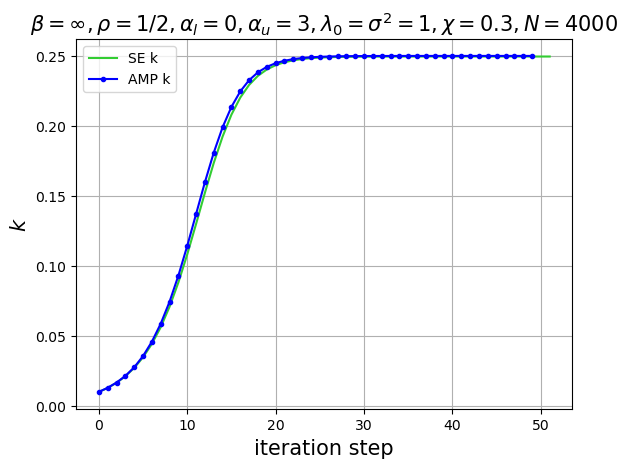

In [547]:
plt.plot(idx_se,se[0],c="limegreen",label="SE k")
plt.plot(idx_amp,k_amp,c="b",label="AMP k",marker=".")
plt.title(r'$\beta=\infty,\rho=1/2,\alpha_l=0,\alpha_u=3,\lambda_0=\sigma^2=1,\chi=0.3, N=4000$',fontsize=15)
plt.ylabel(r'$k$',fontsize=15)
plt.xlabel("iteration step",fontsize=15)
plt.grid()
plt.legend()
plt.show()

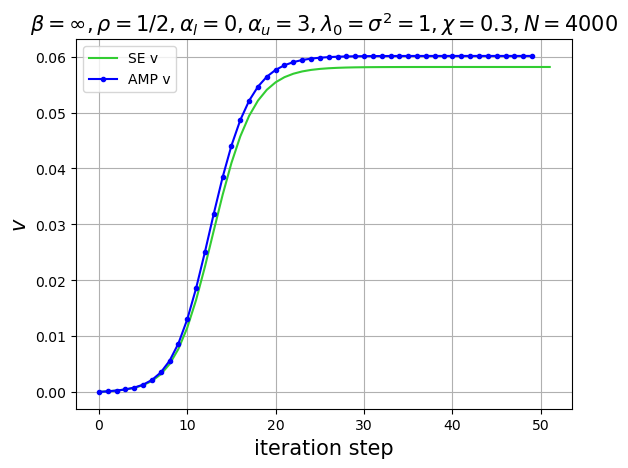

In [548]:
plt.plot(idx_se,se[1],c="limegreen",label="SE v")
plt.plot(idx_amp,sig_amp,c="b",label="AMP v",marker=".")
plt.title(r'$\beta=\infty,\rho=1/2,\alpha_l=0,\alpha_u=3,\lambda_0=\sigma^2=1,\chi=0.3, N=4000$',fontsize=15)
plt.ylabel(r'$v$',fontsize=15)
plt.xlabel("iteration step",fontsize=15)
plt.grid()
plt.legend()
plt.show()

In [631]:
#RSB in RMLE:
samp = Data_Sampling(4000,0,1.5)

In [632]:
amp = ampRMLE_srho_ChiFix(samp[1], 0.8)

In [633]:
se = seRMLE_srho_ChiFix(0.8,0,1.5,1,1)

In [634]:
N = 4000
w0=np.ones(N)

In [635]:
idx_se = []
for i in range(se[2]+1):
    idx_se.append(i)

In [636]:
k_amp = []
sig_amp = []
idx_amp=[]
for i in range(amp[2]):
    idx_amp.append(i)
    k_amp.append(amp[0].T[i]@w0/N)
    sig_amp.append(LA.norm(amp[0].T[i]-k_amp[i]*w0)**2/N)

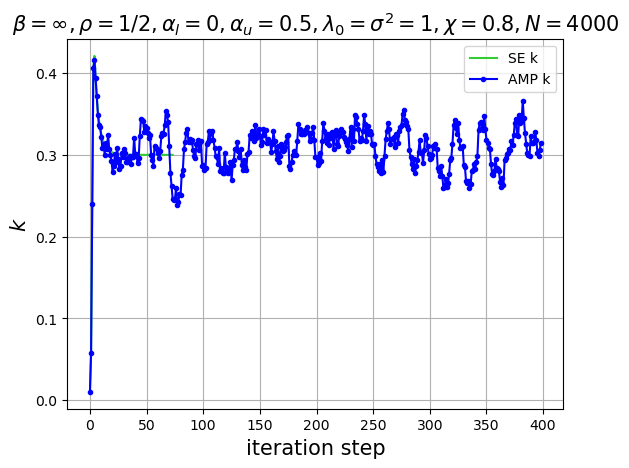

In [637]:
plt.plot(idx_se,se[0],c="limegreen",label="SE k")
plt.plot(idx_amp,k_amp,c="b",label="AMP k",marker=".")
plt.title(r'$\beta=\infty,\rho=1/2,\alpha_l=0,\alpha_u=0.5,\lambda_0=\sigma^2=1,\chi=0.8, N=4000$',fontsize=15)
plt.ylabel(r'$k$',fontsize=15)
plt.xlabel("iteration step",fontsize=15)
plt.grid()
plt.legend()
plt.show()

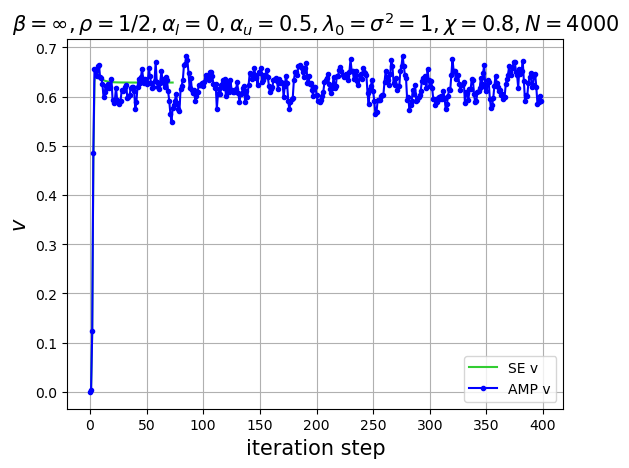

In [638]:
plt.plot(idx_se,se[1],c="limegreen",label="SE v")
plt.plot(idx_amp,sig_amp,c="b",label="AMP v",marker=".")
plt.title(r'$\beta=\infty,\rho=1/2,\alpha_l=0,\alpha_u=0.5,\lambda_0=\sigma^2=1,\chi=0.8, N=4000$',fontsize=15)
plt.ylabel(r'$v$',fontsize=15)
plt.xlabel("iteration step",fontsize=15)
plt.grid()
plt.legend()
plt.show()

#### 3.6 AMP for Bayesian approach

$$\tilde{p}_{\nu,B}^{(t)} = \frac{1}{\sigma^2\sqrt{N}}\sum_j^N x_{\nu j}\hat{w}_{j,B}^{(t)} - \frac{\chi_{B}^{(t)}}{\sigma^4 N}\sum_j^N x_{\nu j}^2 \tilde{F}{\Big(\tilde{p}_{\nu,B}^{(t-1)}\Big)},$$
    $$\chi^{(t+1)}_{B} = \Bigg(\lambda + \frac{\alpha}{\sigma^2} - \frac{1}{\sigma^4 N}\sum_{\nu=1}^{M_u}x_{\nu i}^2\tilde{T}\Big(\tilde{p}_{\nu,B}^{(t)}\Big)\Bigg)^{-1},$$
    $$\hat{w}_{i,B}^{(t+1)} = \frac{\chi^{(t+1)}_{B}}{\sigma^2\sqrt{N}}\Bigg(\sum_{\mu=1}^{M_l}y_{\mu}x_{\mu i}+\sum_{m=1}^{M_u} x_{m i}\tilde{F}{\Big(\tilde{p}_{m,B}^{(t)}\Big)} - \frac{\hat{w}_i^{(t)}}{\sigma^2\sqrt{N}}\sum_{m=1}^{M_u}x_{m i}^2\tilde{T}\Big(\tilde{p}_{m,B}^{(t)}\Big)\Bigg).$$

1, AMP (Bayesian approach) code for special $\rho=1/2$, $\alpha_l=0$, and $\chi$ fixed:

In [587]:
#AMP algorithm: rho = 1/2
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
import random

def ampBA_srho_ChiFix(X, chi): #lambda0 = sigma2 = 1
    M, N = X.shape
    # Initialization
    wV = np.zeros(N)
    pV = np.zeros(M)
    w0 = np.ones(N) #true signal

    # Initialization
    flag_s = 0
    wV = (1 - flag_s) * 0.01 * w0 + flag_s * wV
    pV = (1 - flag_s) * np.zeros(M) + flag_s * pV

    # Preparation
    tmax = 400
    wV_track = np.zeros((N, tmax))
    pV_track = np.zeros((M, tmax))
    X2 = X ** 2

    # AMP loop
    t = 0
    wV_track[:, t] = wV
    pV_track[:, t] = pV
    thre = 1e-6
    ERR = 100
    
    def Ffunc(p):
        return np.tanh(p)

    def Tfunc(F_tmp):
        return 1-F_tmp**2

    while ERR > thre and t < tmax-1:
        wV_1 = wV.copy()
        pV = (1 / np.sqrt(N)) * X @ wV - chi * Ffunc(pV) #simple version for Eq.(39a)
        F_tmp = Ffunc(pV)
        wV = chi * ((1 / np.sqrt(N)) * X.T @ F_tmp - (1 / N) * (wV * (X2.T @ Tfunc(F_tmp)))) #Eq.(39c)
        ERR = np.linalg.norm(wV - wV_1)
        t += 1
        wV_track[:, t] = wV
        pV_track[:, t] = pV
        #if t >= tmax:
           # break

    wV_log = wV_track[:, :t+1]
    pV_log = pV_track[:, :t+1]

    return wV_log, pV_log, t

In [569]:
samp = Data_Sampling(5000,0,3)

In [570]:
amp = ampBA_srho_ChiFix(samp[1], 0.3)

In [571]:
amp[2]

106

In [572]:
se = seBA_srho_ChiFix(0.3,0,3,1,1)

In [573]:
#Consistency check of AMP and SE
N = 5000
w0=np.ones(N)

In [574]:
idx_se = []
for i in range(se[2]+1):
    idx_se.append(i)

In [575]:
k_amp = []
sig_amp = []
idx_amp=[]
for i in range(amp[2]):
    idx_amp.append(i)
    k_amp.append(amp[0].T[i]@w0/N)
    sig_amp.append(LA.norm(amp[0].T[i]-k_amp[i]*w0)**2/N)

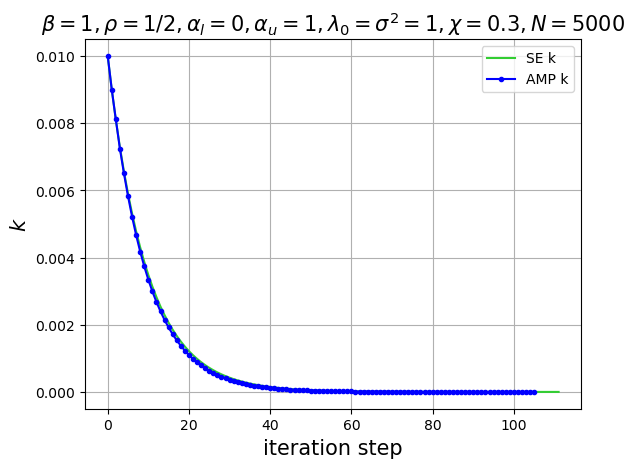

In [576]:
plt.plot(idx_se,se[0],c="limegreen",label="SE k")
plt.plot(idx_amp,k_amp,c="b",label="AMP k",marker=".")
plt.title(r'$\beta=1,\rho=1/2,\alpha_l=0,\alpha_u=1,\lambda_0=\sigma^2=1,\chi=0.3, N=5000$',fontsize=15)
plt.ylabel(r'$k$',fontsize=15)
plt.xlabel("iteration step",fontsize=15)
plt.grid()
plt.legend()
plt.show()

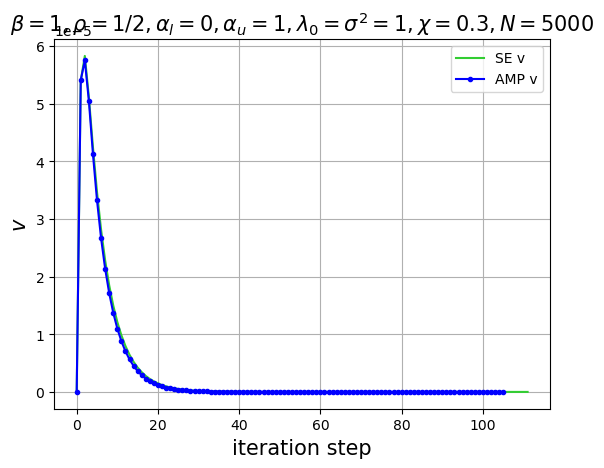

In [577]:
plt.plot(idx_se,se[1],c="limegreen",label="SE v")
plt.plot(idx_amp,sig_amp,c="b",label="AMP v",marker=".")
plt.title(r'$\beta=1,\rho=1/2,\alpha_l=0,\alpha_u=1,\lambda_0=\sigma^2=1,\chi=0.3, N=5000$',fontsize=15)
plt.ylabel(r'$v$',fontsize=15)
plt.xlabel("iteration step",fontsize=15)
plt.grid()
plt.legend()
plt.show()

In [597]:
#RSB:
samp = Data_Sampling(4000,0,1)

In [598]:
amp = ampBA_srho_ChiFix(samp[1], 1.5)

In [599]:
amp[2]

399

In [600]:
se = seBA_srho_ChiFix(1.5,0,1,1,1)

In [601]:
#Consistency check of AMP and SE
N = 4000
w0=np.ones(N)

In [602]:
idx_se = []
for i in range(se[2]+1):
    idx_se.append(i)

In [603]:
k_amp = []
sig_amp = []
idx_amp=[]
for i in range(amp[2]):
    idx_amp.append(i)
    k_amp.append(amp[0].T[i]@w0/N)
    sig_amp.append(LA.norm(amp[0].T[i]-k_amp[i]*w0)**2/N)

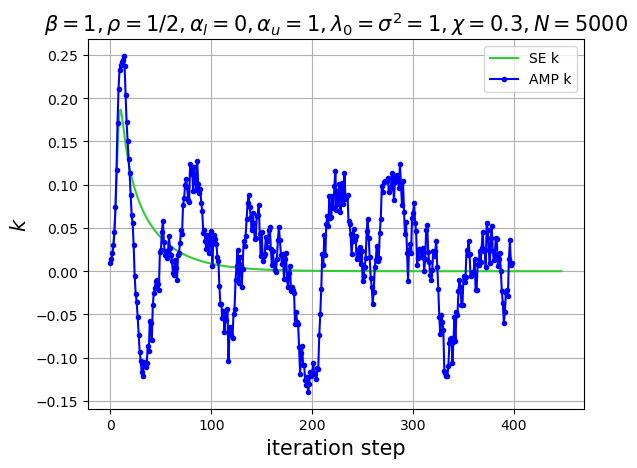

In [604]:
plt.plot(idx_se,se[0],c="limegreen",label="SE k")
plt.plot(idx_amp,k_amp,c="b",label="AMP k",marker=".")
plt.title(r'$\beta=1,\rho=1/2,\alpha_l=0,\alpha_u=1,\lambda_0=\sigma^2=1,\chi=0.3, N=5000$',fontsize=15)
plt.ylabel(r'$k$',fontsize=15)
plt.xlabel("iteration step",fontsize=15)
plt.grid()
plt.legend()
plt.show()

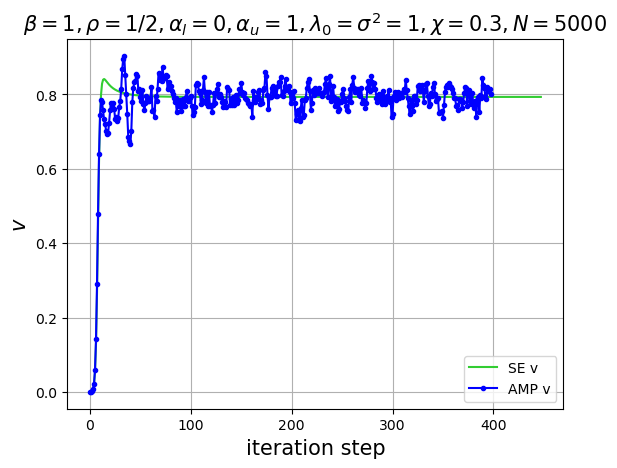

In [605]:
plt.plot(idx_se,se[1],c="limegreen",label="SE v")
plt.plot(idx_amp,sig_amp,c="b",label="AMP v",marker=".")
plt.title(r'$\beta=1,\rho=1/2,\alpha_l=0,\alpha_u=1,\lambda_0=\sigma^2=1,\chi=0.3, N=5000$',fontsize=15)
plt.ylabel(r'$v$',fontsize=15)
plt.xlabel("iteration step",fontsize=15)
plt.grid()
plt.legend()
plt.show()